In [1]:
# importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import os
from os import path

import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns
sns.set_style("whitegrid") # configuração de estilos dos gráficos do seaborn

% matplotlib inline

In [2]:
def modificar_valor_InterfModel(item):
    tmp = item.strip()
    nro = int(tmp[-1:])
    return nro

def modificar_valor_simulacao(nome_diretorio):
    posicao = nome_diretorio.rfind('_')
    posicao += 1
    return nome_diretorio[posicao:]

In [3]:
FILE = 'PRR.txt' # arquivo de interesse
colunas = ['Modelo de colisao', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5']
# dictData = dict() # dicionario que concentrara todos os dados 
DATA = pd.DataFrame()

# obtem uma lista de todos arquivos e subdiretorios do diretorio atual
folders = os.listdir()
folders.sort()


for folder in filter(lambda x: path.isdir(x),folders):
    os.chdir(folder)
    if path.isfile(FILE):
        simulacao = modificar_valor_simulacao(folder)
        dfPRR = pd.read_csv(FILE,delimiter='|',names=colunas)
        dfPRR['Modelo de colisao'] = dfPRR['Modelo de colisao'].apply(modificar_valor_InterfModel)
        dfPRR['simulacao'] = simulacao
        DATA = DATA.append(dfPRR,ignore_index=True)
        print('coletado dados de ->\t',folder)
    os.chdir('../')
#del dfPRR

coletado dados de ->	 simulacao_4.0.0_PA
coletado dados de ->	 simulacao_4.0.1_PB
coletado dados de ->	 simulacao_4.2.1_CLBin_p=0.1
coletado dados de ->	 simulacao_4.2.2_CLBin_p=0.2
coletado dados de ->	 simulacao_4.2.3_CLBin_p=0.3
coletado dados de ->	 simulacao_4.2.4_CLBin_p=0.4
coletado dados de ->	 simulacao_4.2.5_CLBin_p=0.5
coletado dados de ->	 simulacao_4.2.6_CLBin_p=0.6
coletado dados de ->	 simulacao_4.2.7_CLBin_p=0.7
coletado dados de ->	 simulacao_4.2.8_CLBin_p=0.8
coletado dados de ->	 simulacao_4.2.9_CLBin_p=0.9


In [4]:
DATA.head()

,Modelo de colisao,node 1,node 2,node 3,node 4,node 5,simulacao
0,0,0.948,0.957,0.953,0.846,0.820,PA
1,1,0.902,0.909,0.913,0.741,0.708,PA
2,2,0.919,0.958,0.925,0.789,0.744,PA
3,0,0.794,0.916,0.701,0.730,0.547,PB
4,1,0.638,0.729,0.519,0.519,0.305,PB


In [5]:
labels     =['PA'     ,'PB'     ,'p=0.1' ,'p=0.2'  ,'p=0.3'  ,'p=0.4'  ,'p=0.5'  ,'p=0.6'  ,'p=0.7'   ,'p=0.8'  ,'p=0.9'  ]
colorlabel =['#ff0000','#00c20d','#85a7ff','#2056e9','#678ffe','#375ec8','#1f52e0','#0044ff','#0d2463','#18398b','#002b99']

In [6]:
from pandas.plotting import parallel_coordinates

In [7]:
cmap = cm.get_cmap('RdYlBu')

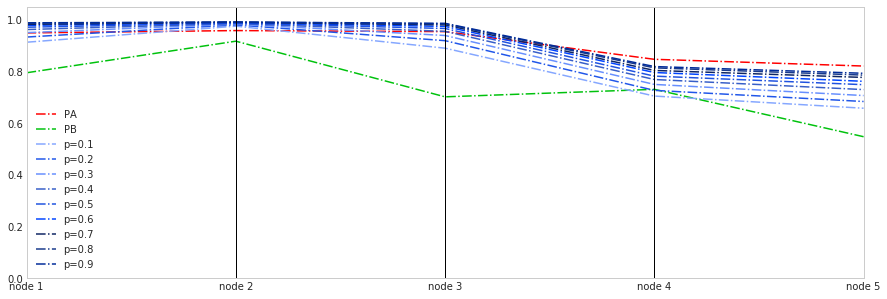

In [8]:
select = DATA['Modelo de colisao'] == 0
df = DATA[select]

fig = plt.figure(figsize=(15,5))
axis = parallel_coordinates(df,
              'simulacao',
              cols=['node 1', 'node 2', 'node 3', 'node 4', 'node 5'],
              #colormap=cmap,
              color=colorlabel,
              linestyle='dashdot',
              sort_labels=False)

axis.set_ylim((0.0, 1.05))
axis.legend(loc='lower left')

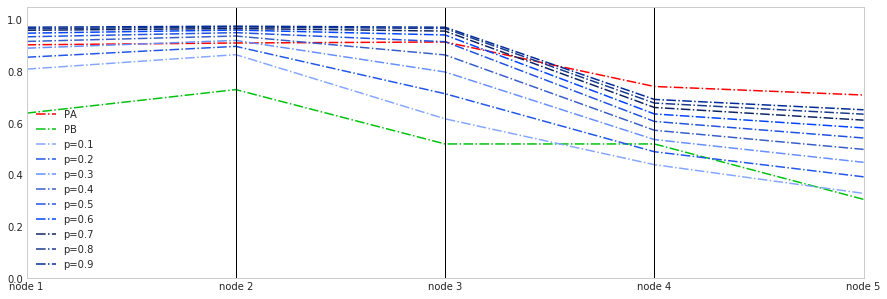

In [9]:
select = DATA['Modelo de colisao'] == 1
df = DATA[select]

fig = plt.figure(figsize=(15,5))
axis = parallel_coordinates(df,
              'simulacao',
              cols=['node 1', 'node 2', 'node 3', 'node 4', 'node 5'],
              #colormap=cmap,
              color=colorlabel,
              linestyle='dashdot',
              sort_labels=False)

axis.set_ylim((0.0, 1.05))
axis.legend(loc='lower left')

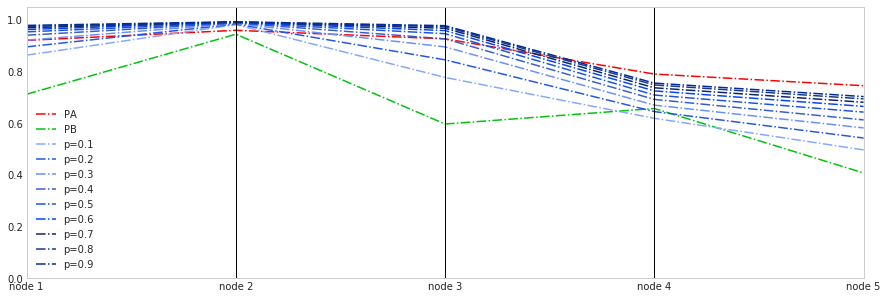

In [10]:
select = DATA['Modelo de colisao'] == 2
df = DATA[select]

fig = plt.figure(figsize=(15,5))
axis = parallel_coordinates(df,
              'simulacao',
              cols=['node 1', 'node 2', 'node 3', 'node 4', 'node 5'],
              #colormap=cmap,
              color=colorlabel,
              linestyle='dashdot',
              sort_labels=False)

axis.set_ylim((0.0, 1.05))
axis.legend(loc='lower left')

In [11]:
#COLOCANDO AS TRÊS IMAGENS EM UMA SÓ

# plt.figure(figsize=(15,5))


# df = DATA[DATA['InterfModel']==0]
# axis = parallel_coordinates(df,'simulacao',cols=['node 1', 'node 2', 'node 3', 'node 4', 'node 5'],color=colorlabel,linestyle='solid')

# df = DATA[DATA['InterfModel']==1]
# axis = parallel_coordinates(df,'simulacao',cols=['node 1', 'node 2', 'node 3', 'node 4', 'node 5'],ax=axis,color=colorlabel,linestyle='dashed')

# df = DATA[DATA['InterfModel']==2]
# axis = parallel_coordinates(df,'simulacao',cols=['node 1', 'node 2', 'node 3', 'node 4', 'node 5'],ax=axis,color=colorlabel,linestyle='dotted')


# axis.set_ylim((0.0, 1.05))
# axis.legend(loc='lower left')
# axis.legend(ncol=3)


#### Links 
Color Mixer. W3school https://www.w3schools.com/colors/colors_mixer.asp

Documentação Pandas sobre parallel_coordinate:
- https://github.com/pandas-dev/pandas/blob/master/pandas/plotting/_misc.py
- https://pandas.pydata.org/pandas-docs/stable/visualization.html#parallel-coordinates

Sobre kwargs do método plot do matplotlib:
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

Legendas do Matplotlib:
- https://matplotlib.org/api/legend_api.html

Color Map do matplotlib:
- https://matplotlib.org/users/colormaps.html




In [12]:
dfData = DATA.melt(id_vars=['Modelo de colisao', 'simulacao'],
          value_vars=['node 1', 'node 2', 'node 3', 'node 4', 'node 5'],
          var_name='node',
          value_name = 'PRR'
         )

In [13]:
dfData.head(10)

,Modelo de colisao,simulacao,node,PRR
0,0,PA,node 1,0.948
1,1,PA,node 1,0.902
2,2,PA,node 1,0.919
3,0,PB,node 1,0.794
4,1,PB,node 1,0.638
5,2,PB,node 1,0.711
6,0,p=0.1,node 1,0.912
7,1,p=0.1,node 1,0.808
8,2,p=0.1,node 1,0.862
9,0,p=0.2,node 1,0.932


In [14]:
dfData.dtypes

Modelo de colisao      int64
simulacao             object
node                  object
PRR                  float64
dtype: object

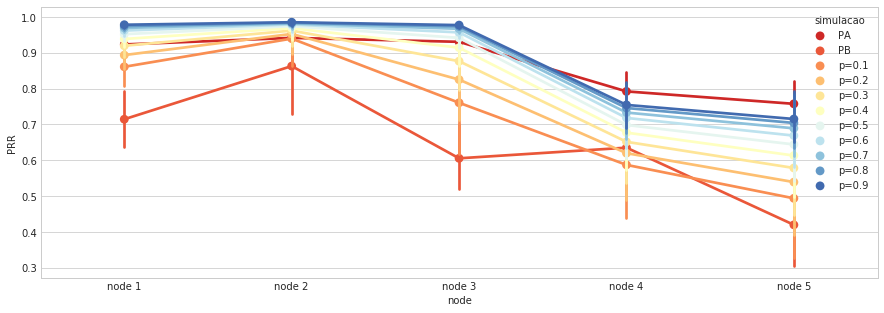

In [15]:
plt.figure(figsize=(15,5))
g = sns.pointplot(x="node", y="PRR", hue="simulacao", data=dfData,
                  palette="RdYlBu",
                  aspect=.75,
                  size=7
                 )

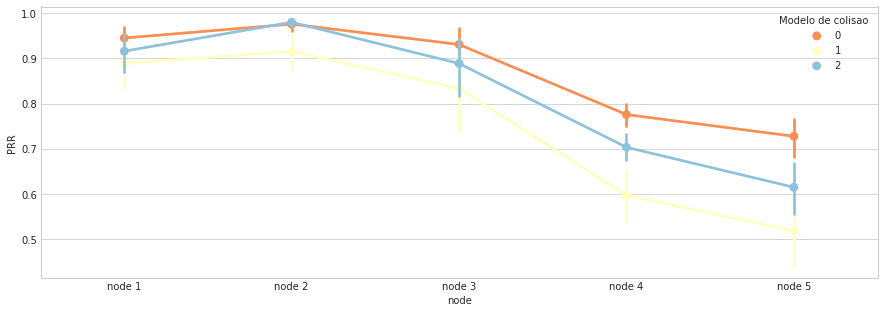

In [16]:
plt.figure(figsize=(15,5))
g = sns.pointplot(x="node", y="PRR", hue="Modelo de colisao", data=dfData,
                  palette="RdYlBu",
                  aspect=.75,
                  size=7
                 )


In [17]:
# sns.barplot(x="node", y="PRR",hue='Modelo de colisao', data=dfData, ci=90.0)

In [18]:
# plt.figure(figsize=(15,5))
# fig = sns.barplot(x="simulacao", y="PRR",hue='node', data=dfData, ci=90.0)
# fig.legend(bbox_to_anchor=(1.1, 1.05))
# fig.set_title("Packet Received Rate - PRR")

Text(0.5,1,'Packet Received Rate - PRR')

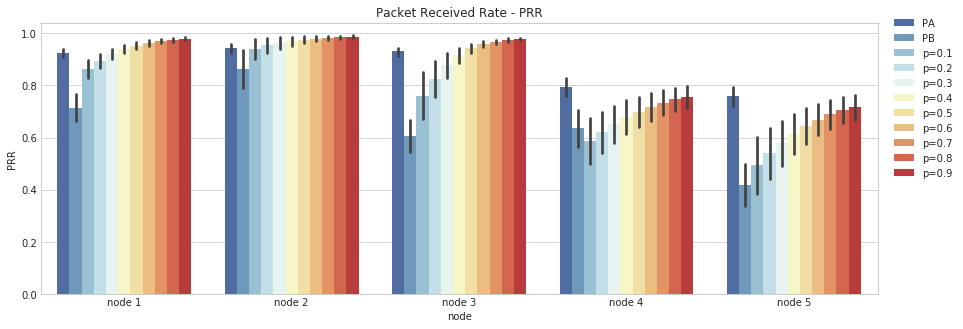

In [19]:
plt.figure(figsize=(15,5))
fig = sns.barplot(x="node", y="PRR",hue='simulacao', data=dfData, ci=90.0, palette='RdYlBu_r')
fig.legend(bbox_to_anchor=(1.1, 1.05))
fig.set_title("Packet Received Rate - PRR")

# AQUI ELE ESTÁ PEGANDO OS TRÊS MODELOS DE COLISÃO E AGREGANDO ELES

In [20]:
# select = ()

# plt.figure(figsize=(15,5))
# fig = sns.barplot(x="node", y="PRR",hue='simulacao', data=dfData, ci=None, palette='RdYlBu_r')
# fig.legend(bbox_to_anchor=(1.1, 1.05))
# fig.set_title("Packet Received Rate - PRR")

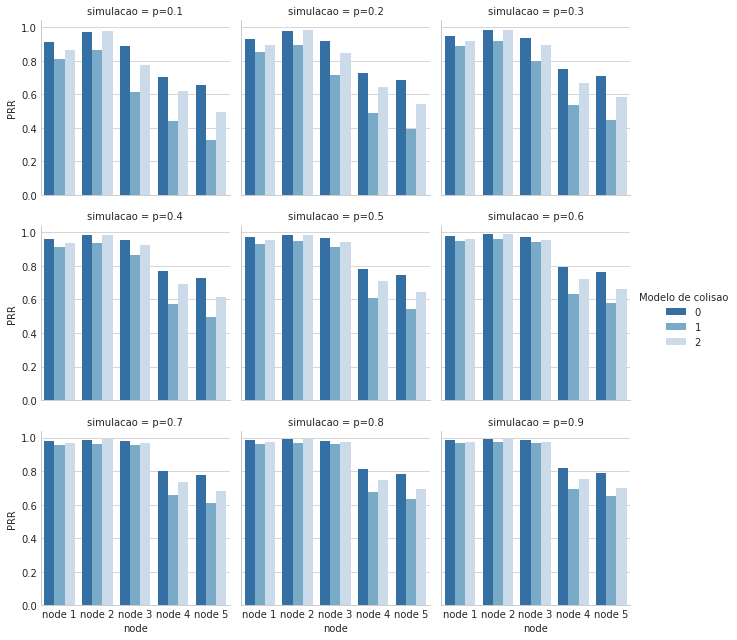

In [21]:
df = dfData[dfData['simulacao'] != 'PB']
df = df[df['simulacao'] != 'PA']

g = sns.factorplot(x="node", y="PRR", hue="Modelo de colisao", col="simulacao", data=df,
                   kind='bar',
                   col_wrap=3,
                   capsize=.2,
                   palette="Blues_r",
                   size=3,
                   aspect=1)

# g.despine(left=True)

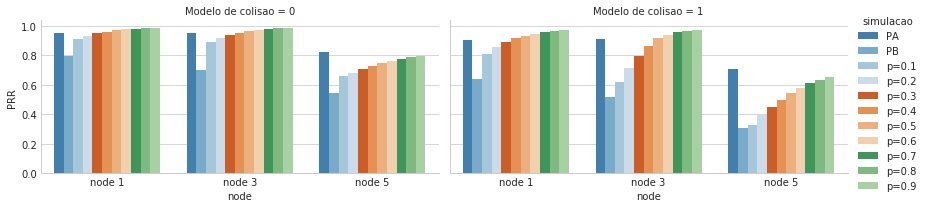

In [22]:
# select = (dfData['Modelo de colisao'] != 2)
# select = (dfData['simulacao'] != 'PB')& (dfData['simulacao'] != 'PA') & (df['Modelo de colisao'] != 2)
select = (dfData['Modelo de colisao'] != 2) & (dfData['node'] != 'node 2') & (dfData['node'] != 'node 4')
df = dfData[select]

g = sns.factorplot(x="node", y="PRR", hue="simulacao", col="Modelo de colisao", data=df,
                   kind='bar',
                   ci=90.0,
                   capsize=.2,
                   palette='tab20c',
                   size=3,
                   aspect=2)

# pb = dfData[(dfData['simulacao'] == 'PB') & (df['InterfModel'] != 2)]
# pa = dfData[(dfData['simulacao'] == 'PA') & (df['InterfModel'] != 2)]

# g.map(plt.plot,'node', 'PRR', pa)
# g.map(plt.plot,'node', 'PRR', pb)

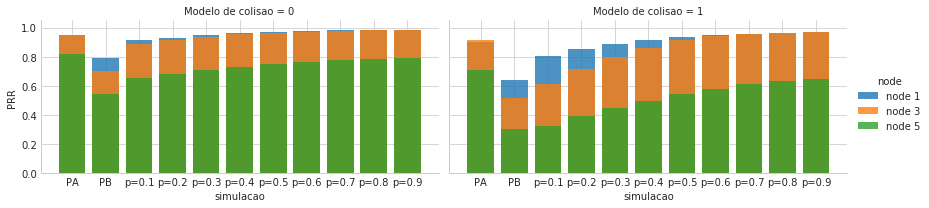

In [23]:
# select = (dfData['simulacao'] != 'PB') & (dfData['simulacao'] != 'PA') & (dfData['Modelo de colisao'] != 2)
select = (dfData['node'] != 'node 2') & (dfData['node'] != 'node 4') & (dfData['Modelo de colisao'] != 2)
df = dfData[select]

grid = sns.FacetGrid(df,
              col='Modelo de colisao',
              hue='node',
              size=3,
              aspect=2,
              palette="tab10",
              legend_out=True
             )
ax = grid.map(plt.bar,'simulacao', 'PRR',alpha=0.8).add_legend()
grid.set(ylim=(0,1.05))

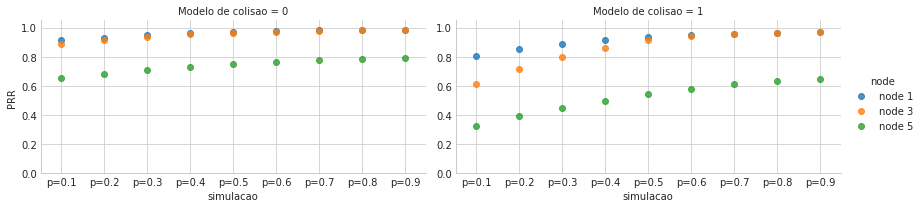

In [24]:
select = (dfData['simulacao'] != 'PB') & (dfData['simulacao'] != 'PA') & (df['Modelo de colisao'] != 2)
df = dfData[select]

grid = sns.FacetGrid(df,
              col='Modelo de colisao',
              hue='node',
              size=3,
              aspect=2,
              sharey=False,
              palette="tab10",
              legend_out=True
             )
ax = grid.map(plt.scatter,'simulacao', 'PRR',alpha=0.8).add_legend()
grid.set(ylim=(0,1.05))

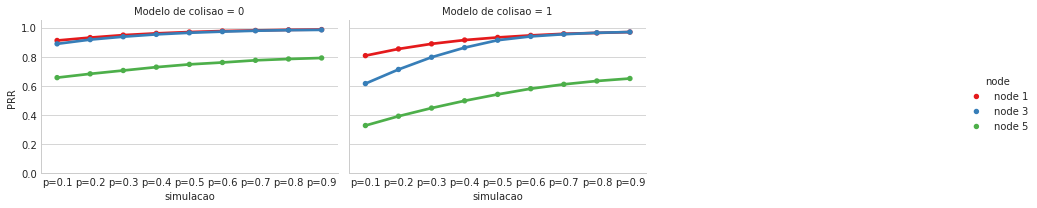

In [25]:
g = sns.factorplot(x="simulacao", y="PRR", hue="node", col="Modelo de colisao", data=df,
                   kind='point',
                   col_wrap=3,
                   join=True,
                   palette="Set1",
                   markers='.',
                   size=3,
                   aspect=1.5)
g.set(ylim=(0,1.05))
g.set()

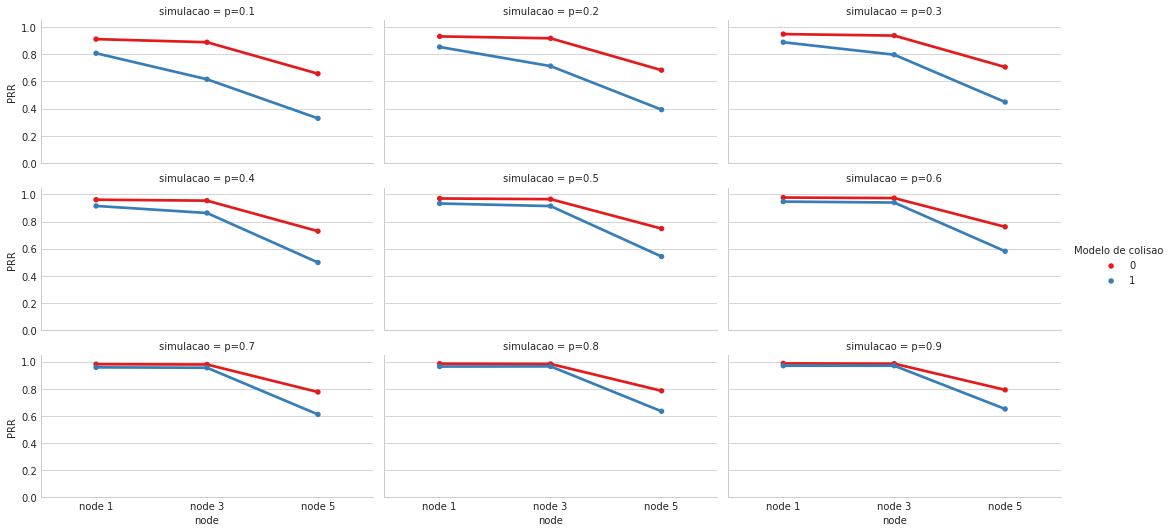

In [26]:
g = sns.factorplot(x="node", y="PRR", hue="Modelo de colisao", col="simulacao", data=df,
                   kind='point',
                   col_wrap=3,
                   join=True,
                   palette="Set1",
                   markers='.',
                   size=2.5,
                   aspect=2)
g.set(ylim=(0,1.05))

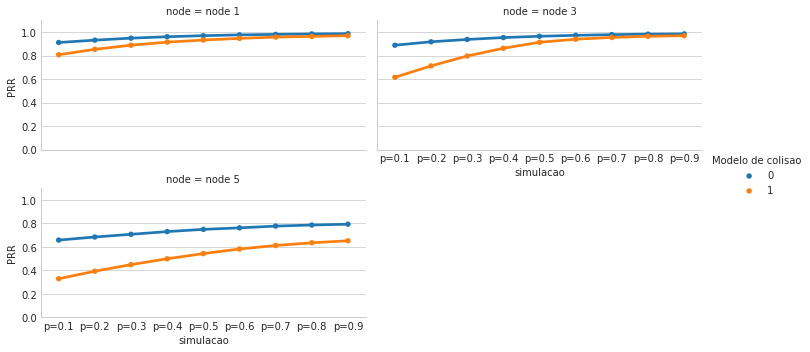

In [27]:
g = sns.factorplot(x="simulacao", y="PRR", hue="Modelo de colisao", col="node", data=df,
                   kind='point',
                   col_wrap=2,
                   join=True,
                   palette="tab10",
                   markers='.',
                   size=2.5,
                   aspect=2)

g.set(ylim=(0,1.1))

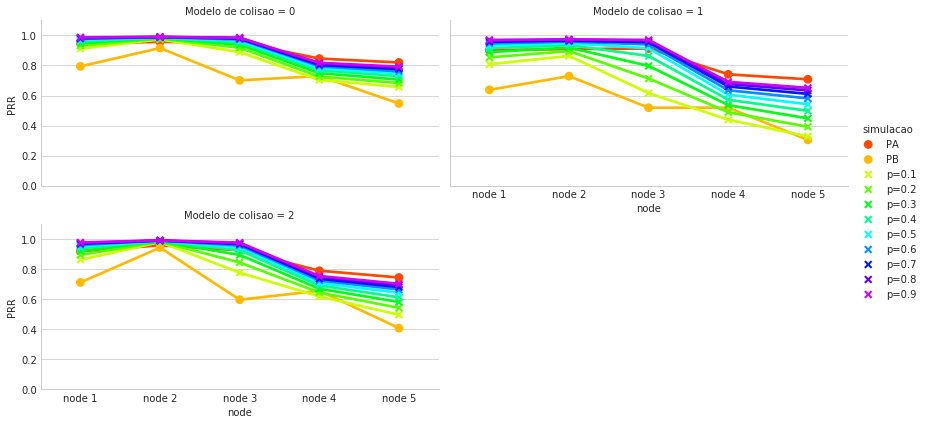

In [28]:
g = sns.factorplot(x="node", y="PRR", hue="simulacao", col="Modelo de colisao", data=dfData,
                   kind='point',
                   col_wrap=2,
                   join=True,
                   palette="gist_rainbow",
                   markers=['o','o','x','x','x','x','x','x','x','x','x'],
                   linestyles='-',
                   size=3,
                   aspect=2)

g.set(ylim=(0,1.1))

In [29]:
# g = sns.FacetGrid(df,col="InterfModel", col_wrap=2, size=3, aspect=2,hue='simulacao')
# g.map(plt.plot,'node','PRR', marker='.')
# g.set(ylim=(0,1.05))